In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [39]:
# Load the dataset
education = pd.read_csv('Education.csv')
politics = pd.read_csv('Politics.csv')
sports = pd.read_csv('Sports.csv')
finance = pd.read_csv('Finance.csv')

df=pd.concat([education,sports,finance,politics],ignore_index=True)

df.head()

,Text,Label
0,The impact of educational reforms remains unce...,positive
1,Critics argue that recent improvements in the ...,negative
2,Innovative teaching methods have led to unexpe...,positive
3,"Despite budget constraints, the school has man...",positive
4,The true effectiveness of online learning plat...,negative


In [40]:
nltk.download('stopwords')
nltk.download('wordnet')
lematizer=WordNetLemmatizer()
lb=LabelEncoder()
cv=CountVectorizer(max_features=2000)
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
def preprocessingText(text):
    text=re.sub("[^a-z A-Z0-9]","",text)
    text=text.lower()
    return text

In [42]:
def preprocessingTextUsingNLTK(text):
    text=preprocessingText(text)
    allEngStopWords=stopwords.words("english")
    if text!=None:
        text= " ".join([ lematizer.lemmatize(word) for word in text.split(" ") if word not in set(allEngStopWords) ])
    else:
        print(text)
    return text

In [43]:
df['Text']=df['Text'].apply(preprocessingTextUsingNLTK)
y=lb.fit_transform(df['Label'])
df.drop(columns=['Label'],inplace=True)
arr=cv.fit_transform(df['Text']).toarray()
X=pd.DataFrame(arr)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,735,736,737,738,739,740,741,742,743,744
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y=y.reshape(-1,1)
y.shape

(209, 1)

# Gaussian Naive Bayes algorithm

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.2)
gnb=GaussianNB()
gnb.fit(X_train,y_train)

g:\project\Sentiment_Analysis_Evaluation\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [46]:
y_pred=gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8571428571428571

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[16  2]
 [ 4 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.91      0.83      0.87        24

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



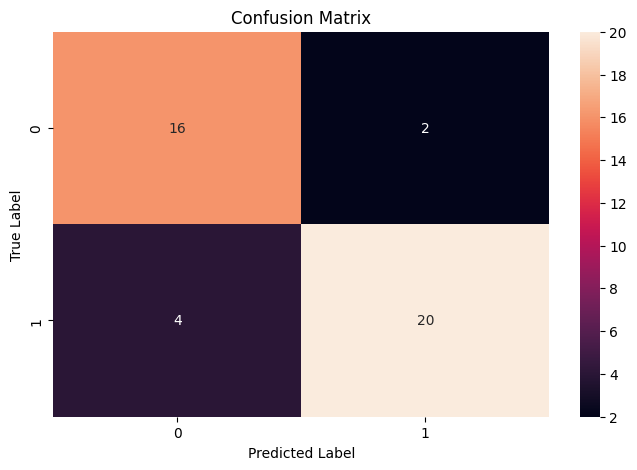

In [48]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Support Vector Classification


In [49]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

g:\project\Sentiment_Analysis_Evaluation\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [50]:
y_pred1 = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


In [51]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

Confusion Matrix:
[[10  8]
 [ 1 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.74      0.96      0.84        24

    accuracy                           0.79        42
   macro avg       0.83      0.76      0.76        42
weighted avg       0.81      0.79      0.77        42



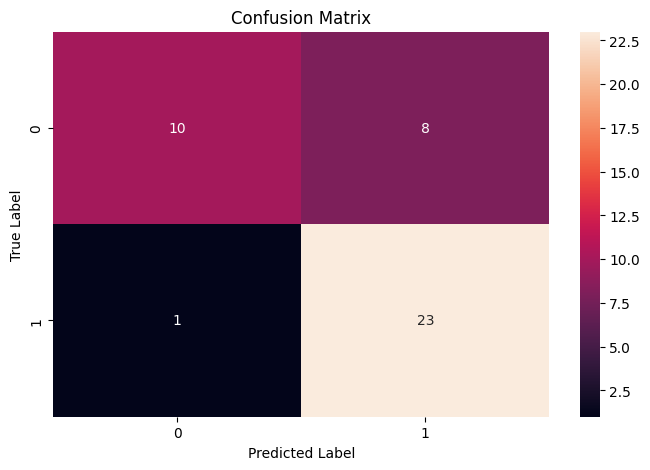

In [52]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix1, annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [53]:
import pickle

with open('gnb_model.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)
